In [48]:
import torch.nn as nn
import torch.optim as optim
import cv2
import numpy as np

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [49]:
img_test = cv2.imread('../data/raw/images/img_0_0.jpg',cv2.IMREAD_UNCHANGED)

In [60]:
test = np.random.randint(0,255,size=(1,8,8))
test = test/255

In [62]:
N_LAYERS = 3

In [93]:
net = nn.Sequential()

net.add_module('flatten', nn.Flatten())
net.add_module(f'lin1',nn.Linear(64,128))
net.add_module(f'act1',nn.ReLU())
net.add_module(f'drop1',nn.Dropout(0.2))
net.add_module(f'lin2',nn.Linear(128,64))
net.add_module(f'act2',nn.ReLU())
net.add_module(f'drop2',nn.Dropout(0.2))
    
net.add_module(f'out',nn.Linear(64,5))
net

Sequential(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lin1): Linear(in_features=64, out_features=128, bias=True)
  (act1): ReLU()
  (drop1): Dropout(p=0.2, inplace=False)
  (lin2): Linear(in_features=128, out_features=64, bias=True)
  (act2): ReLU()
  (drop2): Dropout(p=0.2, inplace=False)
  (out): Linear(in_features=64, out_features=5, bias=True)
)

In [94]:
model = net.to(device)
input_image = torch.tensor(test, device=device).to(torch.float32)

model(input_image)

tensor([[-0.0092, -0.0912, -0.1260,  0.0983, -0.1913]],
       grad_fn=<AddmmBackward0>)

In [109]:
logits = model(input_image)
pred_proba = nn.Softmax(dim=1)(logits)

In [117]:
pred_proba.argmax()

tensor(3)

https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

In [76]:
net(input_image)

RuntimeError: mat1 and mat2 must have the same dtype

In [13]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        for n in range(N_LAYERS):
            pass

In [15]:
net = nn.Sequential()

In [17]:
net.add_module('act1',nn.ReLU())
net.add_module('linear1',nn.Linear(20,10))
net.add_module('conv1',nn.Conv2d(32,64,(3,3)))

In [18]:
print(net)

Sequential(
  (act1): ReLU()
  (linear1): Linear(in_features=20, out_features=10, bias=True)
  (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
)


In [60]:
import pandas as pd
import glob
import cv2
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [43]:
data = load_digits()
img_test = data['images'][0]
arr = cv2.imread('test.png', cv2.IMREAD_UNCHANGED)

In [72]:
import os

In [73]:
os.path.join('../data/raw/images','*.jpg')

'../data/raw/images/*.jpg'

In [56]:
int("../data/raw/images/img_727_1.jpg".split('_')[-1].replace('.jpg', ''))

1

In [71]:
df_train, df_test = (
    pd.DataFrame(glob.glob('../data/raw/images/*.jpg'), columns=['file_name'])
    .assign(target = lambda x: x.file_name.apply(lambda z: int(z.split('_')[-1].replace('.jpg', ''))))
    .pipe((train_test_split),test_size=0.2, random_state=42)
)

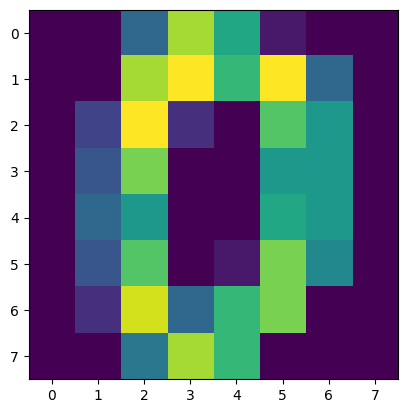

In [27]:
plt.imshow(img_test)

In [25]:
Image.fromarray(img_test, mode='L')

In [28]:
arr = cv2.imread('../data/raw/images/img_0_0.jpg')

In [30]:
arr.shape

(8, 8, 3)

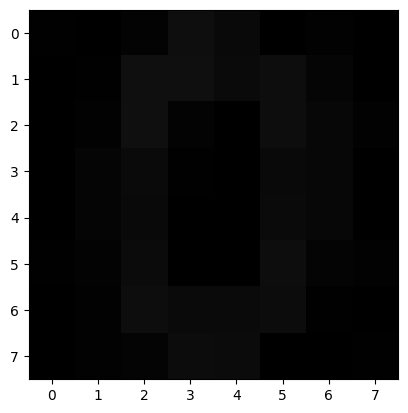

In [13]:
plt.imshow(arr, cmap='viridis')